<a href="https://colab.research.google.com/github/prakritipaul/mhcglobe/blob/main/prakriti_MHCglobe_2024_3_19_5_33PM_endofday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prakriti's 1st Attempt to Run Base Model on One-Hot Coded Features

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [3]:
!git clone https://github.com/prakritipaul/mhcglobe.git

Cloning into 'mhcglobe'...
remote: Enumerating objects: 683, done.
remote: Counting objects: 100% (134/134), done.
remote: Compressing objects: 100% (111/111), done.
remote: Total 683 (delta 72), reused 56 (delta 21), pack-reused 549
Receiving objects: 100% (683/683), 112.39 MiB | 12.01 MiB/s, done.
Resolving deltas: 100% (370/370), done.
Updating files: 100% (196/196), done.
Error downloading object: data/distB62_unique_pseudpsequences.pkl (d151a08): Smudge error: Error downloading data/distB62_unique_pseudpsequences.pkl (d151a0800777499690d258210735bbe1bf8f627fedc59b579281582b6a03b3da): batch response: This repository is over its data quota. Account responsible for LFS bandwidth should purchase more data packs to restore access.

Errors logged to /content/mhcglobe/.git/lfs/logs/20240320T153136.536713834.log
Use `git lfs logs last` to view the log.
error: external filter 'git-lfs filter-process' failed
fatal: data/distB62_unique_pseudpsequences.pkl: smudge filter lfs failed
You can in

In [4]:
import sys
sys.path.append("/content/mhcglobe/src")

### Play around with classes in sequence_functions

#### PseudoSeq

In [5]:
import sequence_functions
test_PseudoSeq = sequence_functions.PseudoSeq()

In [6]:
test_PseudoSeq

In [7]:
test_PseudoSeq.pseudoseq

,allele,sequence
0,HLA-A*01:01,YFAMYQENMAHTDANTLYIIYRDYTWVARVYRGY
1,HLA-A*01:02,YSAMYQENMAHTDANTLYIIYRDYTWVARVYRGY
2,HLA-A*01:03,YFAMYQENMAHTDANTLYIMYRDYTWVARVYRGY
3,HLA-A*01:04,YFAMYQENMAHTDANTLYIIYRDYTWVARVYRGY
4,HLA-A*01:06,YFAMYQENMAHTDANTLYIIYRDYTWVALAYRGY
...,...,...
14632,H-2-Kk,YHSYYRNIAGNIFVNTAYFRYEYYTWADDAYTWY
14633,H-2-Dk,YESDYREIAGNSFVDTLYIRSEFYTWAADAYTWY
14634,H-2-Dp,YVEMYQENADHSFVSNLYIGREFYTWAALAYAWY
14635,H-2-Lq,YESYYRIIAGQWFVNTLYIRYEYYTWAAYAYEWY


In [8]:
# 14637
test_allel2seq = test_PseudoSeq.allele2seq
test_allel2seq
# len(test_allel2seq)
all(len(value) == 34 for value in test_allel2seq.values())

True

##### MHCName

In [9]:
# There are 14637 standard allele names.
standard_allele_names = list(test_PseudoSeq.pseudoseq['allele'].unique())
standard_allele_names[:50]

['HLA-A*01:01',
 'HLA-A*01:02',
 'HLA-A*01:03',
 'HLA-A*01:04',
 'HLA-A*01:06',
 'HLA-A*01:07',
 'HLA-A*01:08',
 'HLA-A*01:09',
 'HLA-A*01:10',
 'HLA-A*01:100',
 'HLA-A*01:101',
 'HLA-A*01:102',
 'HLA-A*01:103',
 'HLA-A*01:104',
 'HLA-A*01:105',
 'HLA-A*01:106',
 'HLA-A*01:107',
 'HLA-A*01:108',
 'HLA-A*01:109',
 'HLA-A*01:110',
 'HLA-A*01:111',
 'HLA-A*01:112',
 'HLA-A*01:113',
 'HLA-A*01:114',
 'HLA-A*01:115',
 'HLA-A*01:116',
 'HLA-A*01:117',
 'HLA-A*01:118',
 'HLA-A*01:119',
 'HLA-A*01:12',
 'HLA-A*01:120',
 'HLA-A*01:121',
 'HLA-A*01:122',
 'HLA-A*01:124',
 'HLA-A*01:125',
 'HLA-A*01:126',
 'HLA-A*01:127',
 'HLA-A*01:128',
 'HLA-A*01:129',
 'HLA-A*01:13',
 'HLA-A*01:130',
 'HLA-A*01:131',
 'HLA-A*01:132',
 'HLA-A*01:133',
 'HLA-A*01:134',
 'HLA-A*01:135',
 'HLA-A*01:136',
 'HLA-A*01:137',
 'HLA-A*01:138',
 'HLA-A*01:139']

In [10]:
allele = "HLA-A*03:01"
allele = allele.replace('*', '').replace(':', '')
allele

'HLA-A0301'

In [11]:
test_MHCName = sequence_functions.MHCName()

In [12]:
def parse_allele(allele):
    """
    Parse allele name to match pseudosequence csv.
    """
    allele = allele.replace('*', '').replace(':', '')
    return(allele)

def is_same(standard_allele_names, query_allele):
    """
    If allele2 parsed matched an allele name in standard alleles
    list, return the allele1 name (from standard alleles). Else
    return allele2 name.
    """
    a_q = parse_allele(query_allele.replace('HLA-', ''))
    for allele1 in standard_allele_names:
        a1 = parse_allele(allele1.replace('HLA-', '')) ####### Make this into a dict to avoid n * n comparisons.
        if a1==a_q:
            return allele1
    else: # Keep allele the same as input.
        print(a1, a_q)
        return query_allele

# my guess
alleles_vct = ["HLA-A*03:01", "HLA-A*02:01", "HLA-A2402"]

# Creating mapping of allele input name to a standardized naming.
allele_dict = {}
for allele in alleles_vct:
    if allele not in allele_dict:
        allele_dict[allele] = is_same(standard_allele_names, allele)
[allele_dict[a] for a in alleles_vct]

# Output
allele_dict

{'HLA-A*03:01': 'HLA-A*03:01',
 'HLA-A*02:01': 'HLA-A*02:01',
 'HLA-A2402': 'HLA-A*24:02'}

#### SeqRepresentation

In [13]:
test_SeqRepresentation = sequence_functions.SeqRepresentation("ONE_HOT")

In [14]:
# Expected 1's on position 0
test_residue = "A"
test_one_hot = test_SeqRepresentation.one_hot(test_residue)
test_one_hot

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [15]:
test_select_peptideencoding = test_SeqRepresentation.select_peptideencoding("BLOSUM62")
test_select_peptideencoding

{'A': [4,
  -1,
  -2,
  -2,
  0,
  -1,
  -1,
  0,
  -2,
  -1,
  -1,
  -1,
  -1,
  -2,
  -1,
  1,
  0,
  -3,
  -2,
  0],
 'R': [-1,
  5,
  0,
  -2,
  -3,
  1,
  0,
  -2,
  0,
  -3,
  -2,
  2,
  -1,
  -3,
  -2,
  -1,
  -1,
  -3,
  -2,
  -3],
 'N': [-2, 0, 6, 1, -3, 0, 0, 0, 1, -3, -3, 0, -2, -3, -2, 1, 0, -4, -2, -3],
 'D': [-2,
  -2,
  1,
  6,
  -3,
  0,
  2,
  -1,
  -1,
  -3,
  -4,
  -1,
  -3,
  -3,
  -1,
  0,
  -1,
  -4,
  -3,
  -3],
 'C': [0,
  -3,
  -3,
  -3,
  9,
  -3,
  -4,
  -3,
  -3,
  -1,
  -1,
  -3,
  -1,
  -2,
  -3,
  -1,
  -1,
  -2,
  -2,
  -1],
 'Q': [-1, 1, 0, 0, -3, 5, 2, -2, 0, -3, -2, 1, 0, -3, -1, 0, -1, -2, -1, -2],
 'E': [-1, 0, 0, 2, -4, 2, 5, -2, 0, -3, -3, 1, -2, -3, -1, 0, -1, -3, -2, -2],
 'G': [0,
  -2,
  0,
  -1,
  -3,
  -2,
  -2,
  6,
  -2,
  -4,
  -4,
  -2,
  -3,
  -3,
  -2,
  0,
  -2,
  -2,
  -3,
  -3],
 'H': [-2,
  0,
  1,
  -1,
  -3,
  0,
  0,
  -2,
  8,
  -3,
  -3,
  -1,
  -2,
  -1,
  -2,
  -1,
  -2,
  -2,
  2,
  -3],
 'I': [-1,
  -3,
  -3,
  -3,
  -1,
 

In [16]:
test_peptide = "ARDVAA"
test_encoded_peptide = test_SeqRepresentation.encode_peptide(test_peptide)
test_encoded_peptide

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]])

In [17]:
test_seq_to_15mer = sequence_functions.seq_to_15mer(test_encoded_peptide)
test_seq_to_15mer

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.

In [18]:
## VIMP TEST!!!
# Came from 1st 3 entries in "mhcglobe_full_train_data.csv"
test_df_data = {"allele": ["HLA-A*03:01", "HLA-A*11:01", "HLA-A*03:01"],
                "peptide": ["EVMPVSMAK", "EVMPVSMAK", "KTFPPTEPK"],
                "measurement_value": [340.6333333333333, 17.14, 219.8166666666667]}
test_df = pd.DataFrame(test_df_data)

In [19]:
test_df

,allele,peptide,measurement_value
0,HLA-A*03:01,EVMPVSMAK,340.633333
1,HLA-A*11:01,EVMPVSMAK,17.140000
2,HLA-A*03:01,KTFPPTEPK,219.816667


In [20]:
test_XY = sequence_functions.get_XY(test_df, "ONE_HOT")
len(test_XY)

2

In [21]:
test_X_alleles = test_XY[0][0]
# 3 (because there are 3 alleles/peptides)
len(test_X_alleles)

test_X_peptides = test_XY[0][1]
# 3 (because there are 3 alleles/peptides)
len(test_X_peptides)

3

In [22]:
# test_X_allele_1 = test_X_alleles[0]
# 34
# len(test_X_allele_1)
# test_X_allele_1

test_X_peptide_1 = test_X_peptides[0]
# 15
len(test_X_peptide_1)
# test_X_peptide_1

15

### Play around with classes in mhc_data


#### MHCData object (will contain pseudoseq etc.)
### Step 1: Get the data (test_pMHC_Data_both_data)

In [23]:
import mhc_data

In [24]:
# Contains both human and non-human
# BA + EL
test_pMHC_Data_both = mhc_data.pMHC_Data(only_EL=False, drop_duplicate_records=False)
# this is a df (later used as df_train)
test_pMHC_Data_both_data = test_pMHC_Data_both.data
test_pMHC_Data_both_data


,allele,dataset,measurement_inequality,measurement_type,measurement_value,peptide,Gene,is_ABC,is_human
0,HLA-A*03:01,IEDB,=,BA,340.633333,EVMPVSMAK,HLA-A,True,True
1,HLA-A*11:01,IEDB,=,BA,17.140000,EVMPVSMAK,HLA-A,True,True
2,HLA-A*03:01,IEDB,=,BA,219.816667,KTFPPTEPK,HLA-A,True,True
3,HLA-A*11:01,IEDB,=,BA,222.213333,KTFPPTEPK,HLA-A,True,True
4,HLA-A*03:01,IEDB,=,BA,57.250000,RLYYDSMSY,HLA-A,True,True
...,...,...,...,...,...,...,...,...,...
1229833,HLA-B*44:02,MHCFlury2_S1,<,MA,100.000000,AEHDRIARQ,HLA-B,True,True
1229834,HLA-B*44:02,MHCFlury2_S1,<,MA,100.000000,EEQRAQQQL,HLA-B,True,True
1229835,HLA-A*02:01,MHCFlury2_S1,<,MA,100.000000,SLLTDIIAA,HLA-A,True,True
1229836,HLA-B*44:02,MHCFlury2_S1,<,MA,100.000000,EENMHDLQY,HLA-B,True,True


In [25]:
test_pMHC_Data_both.positives


,allele,dataset,measurement_inequality,measurement_type,measurement_value,peptide,Gene,is_ABC,is_human
0,HLA-A*03:01,IEDB,=,BA,340.633333,EVMPVSMAK,HLA-A,True,True
1,HLA-A*11:01,IEDB,=,BA,17.140000,EVMPVSMAK,HLA-A,True,True
2,HLA-A*03:01,IEDB,=,BA,219.816667,KTFPPTEPK,HLA-A,True,True
3,HLA-A*11:01,IEDB,=,BA,222.213333,KTFPPTEPK,HLA-A,True,True
4,HLA-A*03:01,IEDB,=,BA,57.250000,RLYYDSMSY,HLA-A,True,True
...,...,...,...,...,...,...,...,...,...
1229833,HLA-B*44:02,MHCFlury2_S1,<,MA,100.000000,AEHDRIARQ,HLA-B,True,True
1229834,HLA-B*44:02,MHCFlury2_S1,<,MA,100.000000,EEQRAQQQL,HLA-B,True,True
1229835,HLA-A*02:01,MHCFlury2_S1,<,MA,100.000000,SLLTDIIAA,HLA-A,True,True
1229836,HLA-B*44:02,MHCFlury2_S1,<,MA,100.000000,EENMHDLQY,HLA-B,True,True


### Playing around with saved model to get actual weight and bias values/checkpoints - UNSUCCESFUL

In [26]:
# sys.path.append("/content/mhcglobe/src/model/mhcglobe/full/model14_fold13_ONE_HOT_full")
sys.path.append("/content/mhcglobe/src/model/mhcglobe/init/model14_fold13_ONE_HOT_full")

In [27]:
# model_dir = "/content/mhcglobe/model/mhcglobe/full/model14_fold13_ONE_HOT_full/"
model_dir = "/content/mhcglobe/model/mhcglobe/init/model14_fold13_ONE_HOT_init/"
eric_model_1 = tf.saved_model.load(model_dir)

# model_dir = "/content/mhcglobe/model/mhcglobe/init/model37_fold15_ONE_HOT_init"
# eric_model_2 = tf.saved_model.load(model_dir)

In [28]:
for var in eric_model_1.variables:
    print(var.name, var.shape)

d1/kernel:0 (980, 128)
d1/bias:0 (128,)
d2/kernel:0 (1108, 128)
d2/bias:0 (128,)
d3/kernel:0 (1236, 512)
d3/bias:0 (512,)
output/kernel:0 (512, 1)
output/bias:0 (1,)


In [29]:
eric_model_1.signatures

_SignatureMap({'serving_default': <ConcreteFunction (*, mhc_input: TensorSpec(shape=(None, 34, 20), dtype=tf.float32, name='mhc_input'), peptide_input: TensorSpec(shape=(None, 15, 20), dtype=tf.float32, name='peptide_input')) -> Dict[['output', TensorSpec(shape=(None, 1), dtype=tf.float32, name='output')]] at 0x7A52383FA4A0>})

In [30]:
# ChatGPT

# Path to the directory containing the checkpoint files, without the file extension
checkpoint_path = "/content/mhcglobe/model/mhcglobe/full/model14_fold13_ONE_HOT_full/variables/"

# Create a CheckpointReader
reader = tf.train.load_checkpoint(checkpoint_path)

# List variable names and shapes
var_shapes = reader.get_variable_to_shape_map()
for name in var_shapes:
    print(f"Variable name: {name}, shape: {var_shapes[name]}")

ValueError: Couldn't find 'checkpoint' file or checkpoints in given directory /content/mhcglobe/model/mhcglobe/full/model14_fold13_ONE_HOT_full/variables/

In [ ]:
import tensorflow as tf

checkpoint_path = "/content/mhcglobe/model/mhcglobe/full/model14_fold13_ONE_HOT_full/variables/variables.data-00000-of-00002"

# Create a checkpoint reader
reader = tf.train.load_checkpoint(checkpoint_path)

# Get the variable names
variable_names = reader.get_variable_to_shape_map().keys()

# Print the variable names
for variable_name in variable_names:
  print(variable_name)

# Get the value of a variable
variable_value = reader.get_tensor(variable_name)

# Print the variable value
print(variable_value)

### Attempt to load Eric's model and inspect contents - SUCCESS!

In [31]:
import train_functions

In [32]:
eric_model_1b = train_functions.load_trained_mhcglobe_model(model_path=model_dir)

#### Is it compiled? Yes! What are the attributes of the optimizer?

In [38]:
print(eric_model_1b.optimizer, "\n")
print(eric_model_1b.optimizer.learning_rate, "\n")
print(eric_model_1b.optimizer.epsilon, "\n")
print(eric_model_1b.optimizer.momentum, "\n")
print(eric_model_1b.optimizer.centered, "\n")



<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0011339304> 

6.848580326162904e-07 

<tf.Variable 'momentum:0' shape=() dtype=float32, numpy=0.5> 

True 



#### Success!

In [49]:
eric_model_1b.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 mhc_input (InputLayer)      [(None, 34, 20)]             0         []                            
                                                                                                  
 peptide_input (InputLayer)  [(None, 15, 20)]             0         []                            
                                                                                                  
 flatten_1 (Flatten)         (None, 680)                  0         ['mhc_input[0][0]']           
                                                                                                  
 flatten (Flatten)           (None, 300)                  0         ['peptide_input[0][0]']       
                                                                                              

In [51]:
for layer in eric_model_1b.layers:
    # Assuming functional API; for Sequential models, this approach won't work directly
    if hasattr(layer, 'inbound_nodes'):
        for node in layer.inbound_nodes:
            print(f'Layer {layer.name} is connected to {node.inbound_layers}')


Layer mhc_input is connected to []
Layer peptide_input is connected to []
Layer flatten_1 is connected to <keras.src.engine.input_layer.InputLayer object at 0x7a522c124460>
Layer flatten is connected to <keras.src.engine.input_layer.InputLayer object at 0x7a522c1250f0>
Layer concat is connected to [<keras.src.layers.reshaping.flatten.Flatten object at 0x7a522c125570>, <keras.src.layers.reshaping.flatten.Flatten object at 0x7a522c127be0>]
Layer d1 is connected to <keras.src.layers.merging.concatenate.Concatenate object at 0x7a522c127910>
Layer dropout_d1 is connected to <keras.src.layers.core.dense.Dense object at 0x7a522c1276a0>
Layer skip1 is connected to [<keras.src.layers.merging.concatenate.Concatenate object at 0x7a522c127910>, <keras.src.layers.regularization.dropout.Dropout object at 0x7a523f437670>]
Layer d2 is connected to <keras.src.layers.merging.concatenate.Concatenate object at 0x7a523f4372e0>
Layer dropout_d2 is connected to <keras.src.layers.core.dense.Dense object at 0x

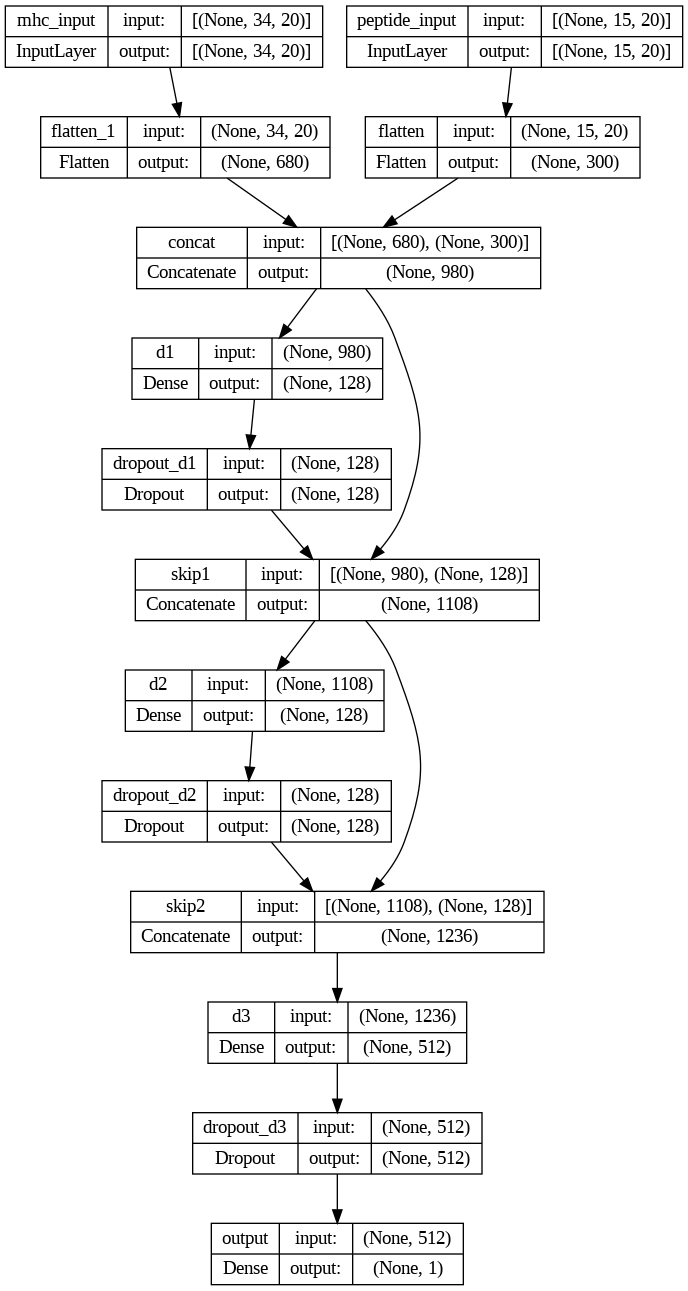

In [52]:
from tensorflow.keras.utils import plot_model

plot_model(eric_model_1b, to_file='model.png', show_shapes=True, show_layer_names=True)


In [53]:
eric_model_1b.loss

<bound method MSEWithInequalities.loss of <inequality_loss.MSEWithInequalities object at 0x7a522c1b4be0>>

## Attempting to train model/use mhcglobe functions

In [39]:
import mhcglobe

In [40]:
test_ensemble = mhcglobe.ensemble(train_type="init")

In [41]:
test_ensemble_base_models = test_ensemble.ensemble_base_models
test_ensemble_base_models

### ```trainf.BalanceSplitData().get_train_val(df_train)```


In [42]:
# Has all columns from all training data
import train_functions as trainf
df_train = test_pMHC_Data_both_data
train, early_stopping = trainf.BalanceSplitData().get_train_val(df_train)

In [43]:
train

,test,allele,dataset,measurement_inequality,measurement_type,measurement_value,peptide,Gene,is_ABC,is_human
0,False,HLA-A*02:04,IEDB,=,BA,4000.0,TLGIVCPI,HLA-A,True,True
1,False,HLA-A*02:04,IEDB,>,BA,100000.0,YLEPAIAKY,HLA-A,True,True
3,False,HLA-A*02:04,IEDB,>,BA,100000.0,LQTTIHDII,HLA-A,True,True
5,False,HLA-A*02:04,S3_Only,<,BA,500.0,FLPSDCFPSV,HLA-A,True,True
7,False,HLA-A*02:04,S3_Only,<,BA,500.0,LSKIFLLGG,HLA-A,True,True
...,...,...,...,...,...,...,...,...,...,...
1229832,False,Mamu-B*08:01,S3_Only,<,SA,100.0,YRQPIPVQEL,Mamu-,False,False
1229833,False,Mamu-B*08:01,S3_Only,<,SA,100.0,YRQPSQAGL,Mamu-,False,False
1229834,False,Mamu-B*08:01,S3_Only,<,SA,100.0,YRQVASHVGL,Mamu-,False,False
1229835,False,Mamu-B*08:01,S3_Only,<,SA,100.0,YRVLQRANL,Mamu-,False,False


In [44]:
early_stopping

,test,allele,dataset,measurement_inequality,measurement_type,measurement_value,peptide,Gene,is_ABC,is_human
2,True,HLA-A*02:04,IEDB,<,BA,1000.0,FLPSDFFPSV,HLA-A,True,True
4,True,HLA-A*02:04,IEDB,=,BA,11000.0,YMLDLQPETT,HLA-A,True,True
6,True,HLA-A*02:04,S3_Only,>,BA,5000.0,KVFPYALINK,HLA-A,True,True
8,True,HLA-A*02:04,S3_Only,<,BA,500.0,SRFSWGGEG,HLA-A,True,True
10,True,HLA-A*02:04,IEDB,<,SA,100.0,ALLDKLYALGL,HLA-A,True,True
...,...,...,...,...,...,...,...,...,...,...
1229815,True,Mamu-B*08:01,S3_Only,<,SA,100.0,VTDGKEVLL,Mamu-,False,False
1229816,True,Mamu-B*08:01,S3_Only,<,SA,100.0,VTDPRVVDL,Mamu-,False,False
1229820,True,Mamu-B*08:01,S3_Only,<,SA,100.0,YDGKVMKL,Mamu-,False,False
1229827,True,Mamu-B*08:01,S3_Only,<,SA,100.0,YRHPTVPHL,Mamu-,False,False


In [45]:
# Seeing if I can train on this as well!
# Has "allele", "peptide", "measurement_inequality", "measurement_type"
df_train_2 = pd.read_csv('/content/mhcglobe/example/example_binding_data.csv')
train_2, early_stopping_2 = trainf.BalanceSplitData().get_train_val(df_train_2)

In [46]:
train_2

,test,allele,peptide,measurement_inequality,measurement_value
0,False,HLA-B*40:01,IEETNMITL,=,11.90
1,False,HLA-B*58:01,VSSAVPTSW,=,4.00
2,False,HLA-A*02:11,FLWDPAKRTSV,<,100.00
3,False,HLA-B*35:08,LPEVLPQGQLTAY,<,500.00
4,False,HLA-A*68:02,MTTEDMLTV,=,19.10
...,...,...,...,...,...
95,False,HLA-B*40:02,QEIRTFSFQL,=,68.00
96,False,HLA-B*54:01,FPYIMGSVEL,=,155.00
97,False,HLA-B*57:01,RVMGITAEW,=,2.97
98,False,HLA-B*57:01,MGITAEWLW,=,8.74


In [47]:
early_stopping_2

,test,allele,peptide,measurement_inequality,measurement_value
20,True,HLA-A*03:01,ALNSVANRSK,=,15.6000
32,True,HLA-B*07:02,VPAPHGVAL,=,16.0000
38,True,HLA-A*02:02,MTSTRTIILV,=,1982.5000
58,True,HLA-A*31:01,MISRMLINR,=,4.3700
71,True,HLA-A*02:01,ILFPDDVQEL,=,1.1000
76,True,HLA-A*02:01,FLAHLQWFA,=,0.1005
78,True,HLA-A*02:01,LLSTTEWQV,=,67.0000
84,True,HLA-A*02:03,ALLENIHRV,=,2.0000


### Step 2: ```setup_data_training```

In [48]:
df_train = test_pMHC_Data_both_data
test_setup_data_training = test_ensemble.setup_data_training(df_train)

KeyboardInterrupt: 

In [ ]:
X_tr, Y_tr, X_es, Y_es = test_setup_data_training

In [ ]:
Y_tr

### Compile the Model - don't think I need to do this

In [ ]:
def build__mhcglobe_optimizer(hparams):
    optimizer = optimizers.RMSprop(
        learning_rate=hparams['rms_learning_rate'],
        momentum=hparams['rms_momentum'],
        epsilon=hparams['rms_epsilon'],
        centered=hparams['rms_centered'])
    return optimizer

def get_compiled_mhcglobe_model(hparams):
    # build tensorflow graph and optimizer
    K.clear_session()

    model = build_deepnet.BuildModel('mhcglobe').build_graph(hparams)
    #print(model.summary())
    optimizer = build_optimizer(hparams)

    inequality_loss = il.MSEWithInequalities().loss
    model.compile(loss=inequality_loss,
                       optimizer=optimizer)
    return model


### Step 3: Fit the Model - I think this is it!

In [ ]:
new_model_path, verbose = "/content/mhcglobe/outputs", 0
init_model = eric_model_1b
new_model = trainf.train_mhcglobe_model(init_model, X_tr, Y_tr, X_es, Y_es, new_model_path, verbose)

### From Eric's Tutorial

In [ ]:
# Load example training data (This can be my HLA data)
training_cols = ['allele', 'peptide', 'measurement_value', 'measurement_inequality']
binding_data = pd.read_csv(example_binding_data, usecols=training_cols)

# Example paths to save user re-trained MHCGlobe.
new_model_id   = 'mhcglobe_example'                                              # user defined model identifier.
new_model_path = f'./outputs/example_mhcglobe/{new_model_id}'  # path to save re-trained model.

# Re-train MHCGlobe
user_mhcglobe = mhcglobe.ensemble(train_type='init').train_ensemble(
        df_train          = binding_data,
        new_mhcglobe_path = new_model_path,
        verbose           = 0)

# Load re-trained MHCGlobe
user_mhcglobe = mhcglobe.ensemble(new_mhcglobe_path=new_model_path)

# Predict peptide-MHC binding with re-trained MHCGlobe.
user_mhcglobe.predict_on_dataframe(binding_data.loc[:, prediction_cols])

## 1. Make your dataset. Make a one-hot version and a BERT version of X (aka inputs). Y (outputs) is the same

## 2. Load one of my base tensorflow models. Then make sure it can predict with the one-hot input

Don't forget early stopping, etc. as Eric did during training! Q: does this only pertain to hyperparameter tuning?

In [ ]:
# df_train [allele, peptide, measurement_value]
df_train = test_pMHC_Data_both_data

# Data
X_tr, Y_tr, X_es, Y_es = setup_data_training(df_train)

# Train
new_model = trainf.train_mhcglobe_model(init_model, X_tr, Y_tr, X_es, Y_es, new_model_path, verbose)

## 3. Add a fully connected layer (also called linear layer) to the beginning of my tensorflow model so that it can take the larger BERT dimension input





## 4. Retrain the model in 3 above now that you have new features. The retraining in 4 should be with human data.


## 5. Compare performance of the models with one-hot or BERT input. This will give you a clue of your features will help

### Predict on the model

In [ ]:
import sequence_functions as seqf
# 1) Load Base model - should be init!
model_dir = "/content/mhcglobe/model/mhcglobe/init/model14_fold13_ONE_HOT_full/"

# Both methods work!
eric_model_1b = train_functions.load_trained_mhcglobe_model(model_path=model_dir)
# eric_model_1 = tf.saved_model.load(model_dir)

# 2) Load binding data as CSV. Required columns are `allele` and `peptide`.

# Has "allele", "peptide", "measurement_inequality", "measurement_type"
df_csv = '/content/mhcglobe/example/example_binding_data.csv'
prediction_cols = ['allele', 'peptide']

# 3) Use functions
all_pMHC_data = pd.read_csv(df_csv)
pMHC_data = pd.read_csv(df_csv, usecols=prediction_cols)
X = seqf.get_XY(pMHC_data, encode_type="ONE_HOT", get_Y=False)
eric_model_1b.predict(X)

In [ ]:
all_pMHC_data

## 6. Hyperparameter tune with your features